# Counterfactual policy simulations

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deduction

In [2]:
LS = {}
GovS = {}
x = np.linspace(0,2,11)

### Baseline

In [3]:
CoupleEst,SingleEst = SMD.load_est(name='baseline_new',couple=True)
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
LS['baseline'] = figs.resolve_c(Couple, vars=['d', 'RetAge', 'probs'], fradrag=[0,1])
GovS['baseline'] = figs.resolve_c(Couple, vars=['GovS', 'RetAge'], fradrag=x)

### phi=0 (re-estimated)

In [4]:
CoupleEst,SingleEst = SMD.load_est(name='phi0',couple=True)
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
LS['phi0'] = figs.resolve_c(Couple, vars=['d', 'RetAge', 'probs'], fradrag=[0,1])
GovS['phi0'] = figs.resolve_c(Couple, vars=['GovS', 'RetAge'], fradrag=x)

### phi high

In [5]:
CoupleEst,SingleEst = SMD.load_est(name='phi_high',couple=True)
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
LS['phi_high'] = figs.resolve_c(Couple, vars=['d', 'RetAge', 'probs'], fradrag=[0,1])
GovS['phi_high'] = figs.resolve_c(Couple, vars=['GovS', 'RetAge'], fradrag=x)

### Predicted average retirement age

Men

In [6]:
print('baseline                :', np.round(LS['baseline']['couple']['RetAge'][0]['base_m'],2))
print('single                  :', np.round(LS['baseline']['single']['RetAge'][0]['base_m'],2))
print('phi=0                   :', np.round(LS['phi0']['couple']['RetAge'][0]['base_m'],2))
print('phi high                :', np.round(LS['phi_high']['couple']['RetAge'][0]['base_m'],2))

baseline                : 62.27
single                  : 62.3
phi=0                   : 62.68
phi high                : 61.96


Women

In [7]:
print('baseline                :', np.round(LS['baseline']['couple']['RetAge'][0]['base_f'],2))
print('single                  :', np.round(LS['baseline']['single']['RetAge'][0]['base_f'],2))
print('phi=0                   :', np.round(LS['phi0']['couple']['RetAge'][0]['base_f'],2))
print('phi high                :', np.round(LS['phi_high']['couple']['RetAge'][0]['base_f'],2))

baseline                : 61.36
single                  : 61.67
phi=0                   : 61.6
phi high                : 60.53


### Plots

### Retirement probabilities (100.000 DKR deduction)

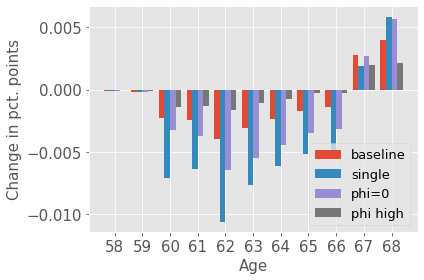

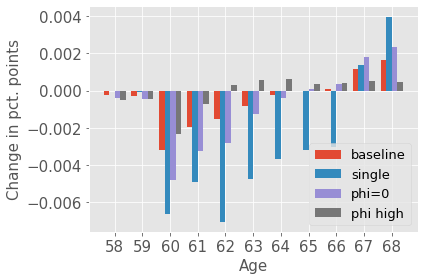

In [11]:
ym = [LS['baseline']['couple']['probs'][1]['base_m']['y'][0]-LS['baseline']['couple']['probs'][0]['base_m']['y'][0],
      LS['baseline']['single']['probs'][1]['base_m']['y'][0]-LS['baseline']['single']['probs'][0]['base_m']['y'][0],
      LS['phi0']['couple']['probs'][1]['base_m']['y'][0]-LS['phi0']['couple']['probs'][0]['base_m']['y'][0],
      LS['phi_high']['couple']['probs'][1]['base_m']['y'][0]-LS['phi_high']['couple']['probs'][0]['base_m']['y'][0]]
yf = [LS['baseline']['couple']['probs'][1]['base_f']['y'][0]-LS['baseline']['couple']['probs'][0]['base_f']['y'][0],
      LS['baseline']['single']['probs'][1]['base_f']['y'][0]-LS['baseline']['single']['probs'][0]['base_f']['y'][0],
      LS['phi0']['couple']['probs'][1]['base_f']['y'][0]-LS['phi0']['couple']['probs'][0]['base_f']['y'][0],
      LS['phi_high']['couple']['probs'][1]['base_f']['y'][0]-LS['phi_high']['couple']['probs'][0]['base_f']['y'][0]]
x = np.arange(58,69)
xlab = 'Age'
ylab = 'Change in pct. points'
labels = ['baseline', 'single', 'phi=0', 'phi high']
one_year_plot(x,ym,labels,xlab,ylab,loc=4).savefig('figs/Experiments/DeductionSurplusMen.png')
one_year_plot(x,yf,labels,xlab,ylab,loc=4).savefig('figs/Experiments/DeductionSurplusWomen.png')

### Goverment surplus

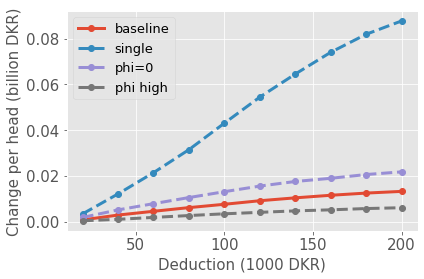

In [21]:
N = Couple.par.simN
labels = ['baseline', 'single', 'phi=0', 'phi high']
ylab = 'Change per head (billion DKR)'
xlab = 'Deduction (1000 DKR)'
x = np.linspace(0,2,11)[1:]*100
linestyle = ['-', '--', '--', '--']
alpha = [1,1,1,1]
y = [change(GovS['baseline']['couple']['GovS'])/(20*N), change(GovS['baseline']['single']['GovS'])/(10*N),
     change(GovS['phi0']['couple']['GovS'])/(20*N), change(GovS['phi_high']['couple']['GovS'])/(20*N)]
change_plot(x,y,labels,xlab,ylab,linestyle,alpha).savefig('figs/Experiments/DeductionSurplus.png')

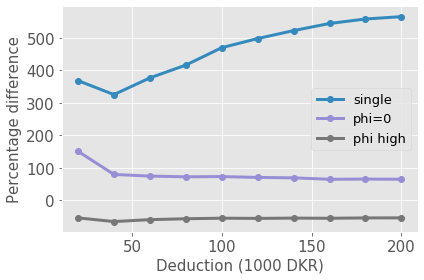

In [22]:
labels = [None, 'single', 'phi=0', 'phi high']
ylab = 'Percentage difference'
linestyle = ['-', '-', '-', '-']
alpha[0] = 0
y_pct = [(y[1]/y[0]-1)*100, (y[1]/y[0]-1)*100, (y[2]/y[0]-1)*100, (y[3]/y[0]-1)*100]
change_plot(x,y_pct,labels,xlab,ylab,linestyle,alpha).savefig('figs/Experiments/DeductionSurplus_pct.png')

# Retirement age

In [21]:
LS = {}
GovS = {}
age = (65,62,60)
ages_dict_one = {'oap_age':   [i+age[0] for i in range(2)],
                 'two_year':  [i+age[1] for i in range(2)],
                 'erp_age':   [i+age[2] for i in range(2)]}
ages_dict = {'oap_age':   [i+age[0] for i in range(7)],
             'two_year':  [i+age[1] for i in range(7)],
             'erp_age':   [i+age[2] for i in range(7)]}

### Baseline

In [22]:
CoupleEst,SingleEst = SMD.load_est(name='baselineW',couple=True)
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
LS['baseline'] = figs.resolve_c(Couple, vars=['d', 'RetAge', 'probs'], **ages_dict_one)
GovS['baseline'] = figs.resolve_c(Couple, vars=['GovS', 'RetAge'], **ages_dict)

### phi=0 (re-estimated)

In [23]:
CoupleEst,SingleEst = SMD.load_est(name='phi0',couple=True)
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
LS['phi0'] = figs.resolve_c(Couple, vars=['d', 'RetAge', 'probs'], **ages_dict_one)
GovS['phi0'] = figs.resolve_c(Couple, vars=['GovS', 'RetAge'], **ages_dict)

### phi high

In [24]:
CoupleEst,SingleEst = SMD.load_est(name='phi_high',couple=True)
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
LS['phi_high'] = figs.resolve_c(Couple, vars=['d', 'RetAge', 'probs'], **ages_dict_one)
GovS['phi_high'] = figs.resolve_c(Couple, vars=['GovS', 'RetAge'], **ages_dict)

### phi=0 (not re-estimated)

In [25]:
Couple.par.phi_0_male = 0
Couple.par.phi_0_female = 0
LS['phi0_not'] = figs.resolve_c(Couple, vars=['d', 'RetAge', 'probs'], **ages_dict_one)
GovS['phi0_not'] = figs.resolve_c(Couple, vars=['GovS', 'RetAge'], **ages_dict)

### Predicted average retirement age

Men

In [26]:
print('baseline                :', np.round(LS['baseline']['couple']['RetAge'][0]['base_m'],2))
print('single                  :', np.round(LS['baseline']['single']['RetAge'][0]['base_m'],2))
print('phi=0                   :', np.round(LS['phi0']['couple']['RetAge'][0]['base_m'],2))
print('phi high                :', np.round(LS['phi_high']['couple']['RetAge'][0]['base_m'],2))
print('phi=0 (not re-estimated):', np.round(LS['phi0_not']['couple']['RetAge'][0]['base_m'],2))

baseline                : 62.26
single                  : 61.25
phi=0                   : 62.83
phi high                : 61.96
phi=0 (not re-estimated): 64.4


Women

In [27]:
print('baseline                :', np.round(LS['baseline']['couple']['RetAge'][0]['base_f'],2))
print('single                  :', np.round(LS['baseline']['single']['RetAge'][0]['base_f'],2))
print('phi=0                   :', np.round(LS['phi0']['couple']['RetAge'][0]['base_f'],2))
print('phi high                :', np.round(LS['phi_high']['couple']['RetAge'][0]['base_f'],2))
print('phi=0 (not re-estimated):', np.round(LS['phi0_not']['couple']['RetAge'][0]['base_f'],2))

baseline                : 61.36
single                  : 63.32
phi=0                   : 61.43
phi high                : 60.53
phi=0 (not re-estimated): 62.43


### Plots

In [8]:
def change(lst):
    return np.array(lst[1:]-lst[0])

def pct_change(nom,denom):
    return (change(nom)/change(denom)-1)*100

In [9]:
def change_plot(x,y,labels,xlab,ylab,linestyle,alpha,lw=3,fs=15,ls=13,save=True):
    
    #prep
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    # plot
    for i in range(len(y)):
        ax.plot(x,y[i], linestyle[i], linewidth=lw, label=labels[i], marker='o', alpha=alpha[i])    
        
    # details
    ax.set_xlabel(xlab, fontsize=fs)
    ax.set_ylabel(ylab, fontsize=fs)    
    ax.legend(fontsize=ls)
    ax.tick_params(axis='both', which='major', labelsize=fs)
    fig.tight_layout()

    if save:
        return fig

In [10]:
def one_year_plot(x,y,labels,xlab,ylab,width=0.2,loc='best',fs=15,ls=13,save=True):
    
    # prep
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # plot
    x_axis = np.arange(len(x))
    for i in range(len(y)):
        ax.bar(x_axis + i*width, y[i], width, label=labels[i])

    ax.set_xticklabels(x)
    ax.set_xlabel(xlab, fontsize=fs)
    ax.set_ylabel(ylab, fontsize=fs)    
    ax.legend(loc=loc,fontsize=ls)
    ax.tick_params(axis='both', which='major', labelsize=fs)    
    ax.set_xticks(x_axis + width + width/2)
    fig.tight_layout()
    if save:
        return fig

### Retirement probabilities - one year increase

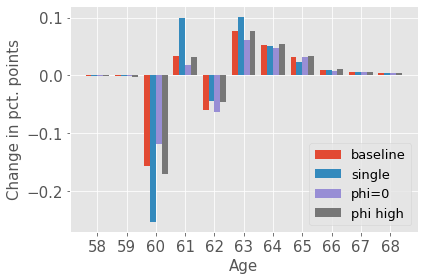

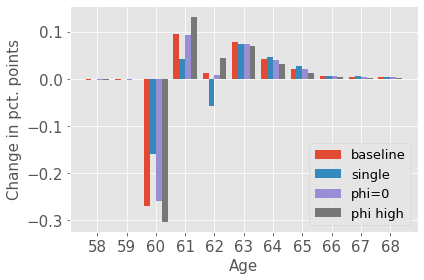

In [140]:
ym = [LS['baseline']['couple']['probs'][1]['base_m']['y'][0]-LS['baseline']['couple']['probs'][0]['base_m']['y'][0],
      LS['baseline']['single']['probs'][1]['base_m']['y'][0]-LS['baseline']['single']['probs'][0]['base_m']['y'][0],
      LS['phi0']['couple']['probs'][1]['base_m']['y'][0]-LS['phi0']['couple']['probs'][0]['base_m']['y'][0],
      LS['phi_high']['couple']['probs'][1]['base_m']['y'][0]-LS['phi_high']['couple']['probs'][0]['base_m']['y'][0]]
yf = [LS['baseline']['couple']['probs'][1]['base_f']['y'][0]-LS['baseline']['couple']['probs'][0]['base_f']['y'][0],
      LS['baseline']['single']['probs'][1]['base_f']['y'][0]-LS['baseline']['single']['probs'][0]['base_f']['y'][0],
      LS['phi0']['couple']['probs'][1]['base_f']['y'][0]-LS['phi0']['couple']['probs'][0]['base_f']['y'][0],
      LS['phi_high']['couple']['probs'][1]['base_f']['y'][0]-LS['phi_high']['couple']['probs'][0]['base_f']['y'][0]]
x = np.arange(58,69)
xlab = 'Age'
ylab = 'Change in pct. points'
labels = ['baseline', 'single', 'phi=0', 'phi high']
one_year_plot(x,ym,labels,xlab,ylab,loc=4).savefig('figs/Experiments/RASurplusMen.png')
one_year_plot(x,yf,labels,xlab,ylab,loc=4).savefig('figs/Experiments/RASurplusWomen.png')

### Goverment surplus

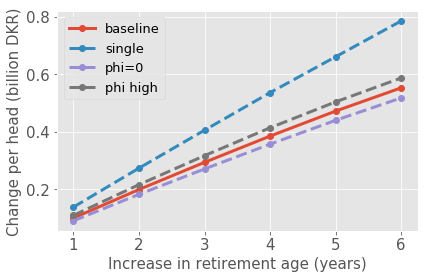

In [141]:
N = Couple.par.simN
labels = ['baseline', 'single', 'phi=0', 'phi high']
ylab = 'Change per head (billion DKR)'
xlab = 'Increase in retirement age (years)'
linestyle = ['-', '--', '--', '--']
alpha = [1,1,1,1]
x = np.arange(1,7)
y = [change(GovS['baseline']['couple']['GovS'])/(20*N), change(GovS['baseline']['single']['GovS'])/(10*N),
     change(GovS['phi0']['couple']['GovS'])/(20*N), change(GovS['phi_high']['couple']['GovS'])/(20*N)]
change_plot(x,y,labels,xlab,ylab,linestyle,alpha).savefig('figs/Experiments/RASurplus.png')

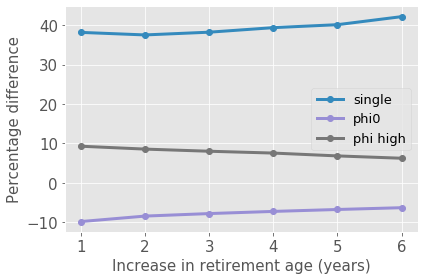

In [142]:
labels = [None, 'single', 'phi0', 'phi high']
ylab = 'Percentage difference'
linestyle = ['-','-','-','-']
y_pct = [(y[1]/y[0]-1)*100, (y[1]/y[0]-1)*100, (y[2]/y[0]-1)*100, (y[3]/y[0]-1)*100]
alpha[0] = 0
change_plot(x,y_pct,labels,xlab,ylab,linestyle,alpha).savefig('figs/Experiments/RASurplus_pct.png')

### Replicate the plot in Jorgensen (2014)

In [143]:
print('phi high                :', np.round(LS['phi_high']['couple']['RetAge'][0]['base'],2))
print('phi=0 (not re-estimated):', np.round(LS['phi0_not']['couple']['RetAge'][0]['base'],2))

phi high                : 61.24
phi=0 (not re-estimated): 63.41


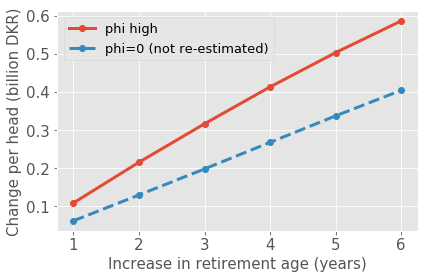

In [144]:
N = Couple.par.simN
labels = ['phi high', 'phi=0 (not re-estimated)']
ylab = 'Change per head (billion DKR)'
xlab = 'Increase in retirement age (years)'
linestyle = ['-', '--']
alpha = [1,1]
x = np.arange(1,7)
y = [change(GovS['phi_high']['couple']['GovS'])/(20*N), change(GovS['phi0_not']['couple']['GovS'])/(20*N)]
change_plot(x,y,labels,xlab,ylab,linestyle,alpha).savefig('figs/Experiments/Thomas.png')

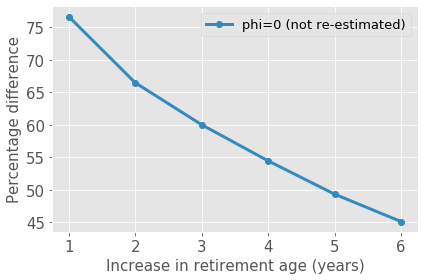

In [145]:
labels = [None, 'phi=0 (not re-estimated)']
ylab = 'Percentage difference'
y_pct = [(y[0]/y[1]-1)*100, (y[0]/y[1]-1)*100]
linestyle[1] = '-'
alpha[0] = 0
change_plot(x,y_pct,labels,xlab,ylab,linestyle,alpha).savefig('figs/Experiments/Thomas_pct.png')